# Setup

In [1]:
# install needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import fill
from math import sqrt
import matplotlib.ticker as mtick


In [2]:
# load data using pandas

yrs = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
df = pd.DataFrame()
temp = pd.DataFrame()

for y in yrs:
    temp = pd.read_csv("Week 4 Data/atp_matches_" + str(y) + ".csv")
    temp['year'] = y
    df = temp if y == yrs[0] else df.append(temp, ignore_index=True)
        

df.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
29639,2018-0605,Tour Finals,Hard,8,F,20181112,299,104925,1.0,NaN,...,23.0,7.0,8.0,5.0,9.0,1.0,8045.0,6.0,4310.0,2018
29640,2018-0605,Tour Finals,Hard,8,F,20181112,300,100644,3.0,NaN,...,25.0,8.0,10.0,2.0,6.0,5.0,5085.0,1.0,8045.0,2018
29641,2018-M-DC-2018-WG-M-FRA-CRO-01,Davis Cup WG F: FRA vs CRO,Clay,4,D,20181123,1,106432,NaN,NaN,...,43.0,18.0,15.0,9.0,13.0,12.0,2480.0,40.0,1050.0,2018
29642,2018-M-DC-2018-WG-M-FRA-CRO-01,Davis Cup WG F: FRA vs CRO,Clay,4,D,20181123,2,105227,NaN,NaN,...,39.0,18.0,15.0,1.0,4.0,7.0,4250.0,259.0,200.0,2018
29643,2018-M-DC-2018-WG-M-FRA-CRO-01,Davis Cup WG F: FRA vs CRO,Clay,4,D,20181123,4,105227,NaN,NaN,...,43.0,21.0,15.0,9.0,12.0,7.0,4250.0,32.0,1245.0,2018


In [3]:
df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
count,29644.000000,2.964400e+04,29644.000000,29644.000000,12890.000000,26436.000000,29640.000000,29644.000000,6951.000000,24599.000000,...,27220.000000,27220.000000,27220.000000,27220.000000,27220.000000,29429.000000,29429.000000,29085.000000,29085.000000,29644.000000
mean,54.520038,2.013493e+07,89.477230,105465.897888,7.385958,186.662014,27.167426,105957.858049,9.002590,185.992479,...,32.753453,14.976745,12.363005,4.731741,8.521381,78.123212,1942.315131,118.688087,1091.597387,2013.442889
std,40.548291,2.877839e+04,111.080504,5991.084944,6.867865,7.365317,3.809086,7860.784582,7.441396,7.096233,...,14.636726,7.206104,4.276675,3.237782,4.098150,141.670462,2480.104561,195.292767,1316.215373,2.877407
min,4.000000,2.009010e+07,1.000000,100644.000000,1.000000,163.000000,14.926762,100644.000000,1.000000,163.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2009.000000
25%,28.000000,2.011051e+07,10.000000,104252.000000,3.000000,183.000000,24.448323,104225.000000,4.000000,183.000000,...,22.000000,10.000000,9.000000,2.000000,6.000000,17.000000,651.000000,36.000000,511.000000,2011.000000
50%,32.000000,2.013101e+07,27.000000,104745.000000,5.000000,185.000000,27.189596,104745.000000,7.000000,185.000000,...,31.000000,14.000000,11.000000,4.000000,8.000000,43.000000,1030.000000,66.000000,765.000000,2013.000000
75%,64.000000,2.016052e+07,151.000000,105238.000000,9.000000,190.000000,29.804244,105413.000000,12.000000,190.000000,...,40.000000,19.000000,15.000000,7.000000,11.000000,82.000000,2030.000000,112.000000,1180.000000,2016.000000
max,128.000000,2.018112e+07,701.000000,208029.000000,33.000000,208.000000,39.378508,207973.000000,33.000000,208.000000,...,284.000000,101.000000,91.000000,25.000000,31.000000,2101.000000,16950.000000,2159.000000,16950.000000,2018.000000


# Create Subset of Data by Player
Pivot dataset to group by winner in order to figure out relevant Pythagorean metric 

In [5]:
col = df.columns.tolist()
w_metrics = col[27:36]
l_metrics = col[36:45]
print(w_metrics)
print(l_metrics)

['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced']
['l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']


In [6]:

df_win = pd.pivot_table(df, index='winner_name', values='winner_id', aggfunc='count')
df_los = pd.pivot_table(df, index='loser_name', values='loser_id', aggfunc='count')
df_cnt = pd.merge(df_win, df_los, how="left", left_index=True, right_index=True)
df_cnt['win_pct'] = df_cnt['winner_id'] / (df_cnt['winner_id'] + df_cnt['loser_id'])

df_sum_w = pd.pivot_table(df, index='winner_name', values=col[27:45], aggfunc='sum')
df_sum_l = pd.pivot_table(df, index='loser_name', values=col[27:45], aggfunc='sum')
# table = pd.concat([df_cnt, df_sum], axis=1)
table = pd.merge(df_cnt, df_sum_w, how="left", left_index=True, right_index=True)
table = pd.merge(table, df_sum_l, how="left", left_index=True, right_index=True)
table = pd.DataFrame.sort_values(table, by='winner_id', ascending=False)

for w,l in zip(w_metrics,l_metrics):
    table[w] = table[w+'_x'] + table[l+'_y']
    table[l] = table[l+'_x'] + table[w+'_y']
    table = table.drop([w+'_x', w+'_y', l+'_x', l+'_y'], axis=1)
table['w_bpWon'] = table['l_bpFaced'] - table['l_bpSaved']
table['l_bpWon'] = table['w_bpFaced'] - table['w_bpSaved']


In [7]:
table.head(10)

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_bpWon,l_bpWon
winner_name,,,,,,,,,,,,,,,,,,,,,
Novak Djokovic,662,108.0,0.859740,3838.0,3738.0,1612.0,2074.0,56446.0,59761.0,36770.0,...,11028.0,10372.0,9199.0,8921.0,2415.0,3780.0,3661.0,6762.0,2982.0,1246.0
Rafael Nadal,589,115.0,0.836648,2103.0,3923.0,1088.0,1818.0,49731.0,53298.0,33883.0,...,9089.0,9214.0,8152.0,8096.0,2302.0,3282.0,3446.0,6007.0,2725.0,1144.0
Roger Federer,570,113.0,0.834553,5436.0,3615.0,1071.0,1845.0,50607.0,55200.0,31802.0,...,10825.0,10605.0,8523.0,8354.0,1755.0,3166.0,2591.0,5345.0,2179.0,836.0
Andy Murray,516,128.0,0.801242,4354.0,2865.0,1493.0,1890.0,48720.0,50996.0,28876.0,...,10400.0,8817.0,7819.0,7713.0,2275.0,3127.0,3592.0,5608.0,2481.0,1317.0
David Ferrer,484,208.0,0.699422,1910.0,2837.0,1784.0,1901.0,51057.0,53107.0,31859.0,...,10267.0,9770.0,8108.0,7987.0,2622.0,3315.0,4255.0,5808.0,2493.0,1633.0
Tomas Berdych,448,219.0,0.671664,4954.0,4257.0,1510.0,1803.0,48776.0,50305.0,28202.0,...,10893.0,9276.0,7883.0,7746.0,2140.0,2640.0,3298.0,4518.0,1878.0,1158.0
Marin Cilic,425,204.0,0.675676,5618.0,3485.0,1644.0,1752.0,48566.0,50803.0,27585.0,...,11180.0,9654.0,7851.0,7748.0,2168.0,2819.0,3372.0,4642.0,1823.0,1204.0
Jo-Wilfried Tsonga,387,177.0,0.686170,5292.0,2872.0,1315.0,1449.0,43576.0,44422.0,27003.0,...,8834.0,8954.0,7057.0,6984.0,1821.0,2175.0,2697.0,3601.0,1426.0,876.0
Stan Wawrinka,375,185.0,0.669643,3889.0,2414.0,1341.0,1510.0,44981.0,45447.0,26047.0,...,10317.0,8921.0,7099.0,6976.0,2125.0,2487.0,3263.0,4087.0,1600.0,1138.0


In [8]:
table.describe()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_bpWon,l_bpWon
count,871.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,...,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,34.034443,35.362854,0.410151,412.772448,411.142681,194.409594,195.01845,5287.416974,5291.134071,3223.810578,...,1049.456335,1048.322263,827.979090,827.843788,269.819188,270.985240,444.915129,447.943419,176.958180,175.095941
std,77.451661,55.294509,0.144963,991.969106,768.902924,362.330604,364.83923,9977.506487,10151.552498,6130.079339,...,2019.785830,1979.266818,1581.982149,1574.576480,484.432109,541.875869,785.187974,912.520961,372.295774,302.886326
min,1.000000,1.000000,0.062500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.316456,8.000000,10.000000,6.000000,6.00000,178.000000,165.000000,111.000000,...,33.000000,35.000000,26.000000,27.000000,9.000000,7.000000,16.000000,12.000000,5.000000,7.000000
50%,4.000000,8.000000,0.405512,38.000000,48.000000,28.000000,26.00000,615.000000,601.000000,384.000000,...,115.000000,123.000000,94.000000,94.000000,36.000000,30.000000,65.000000,46.000000,18.000000,28.000000
75%,21.000000,41.000000,0.500000,292.000000,390.000000,188.000000,195.00000,5155.000000,5106.000000,3081.000000,...,949.000000,1009.000000,796.000000,799.000000,282.000000,244.000000,480.000000,392.000000,149.000000,201.000000
max,662.000000,260.000000,0.859740,10471.000000,4461.000000,2343.000000,2074.00000,56446.000000,59761.000000,36770.000000,...,11180.000000,11095.000000,9199.000000,8921.000000,2622.000000,3780.000000,4261.000000,6762.000000,2982.000000,1840.000000


# Correlation Matrix

In [9]:
table_col = table.columns.tolist()
print(table_col)


['winner_id', 'loser_id', 'win_pct', 'w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'w_bpWon', 'l_bpWon']


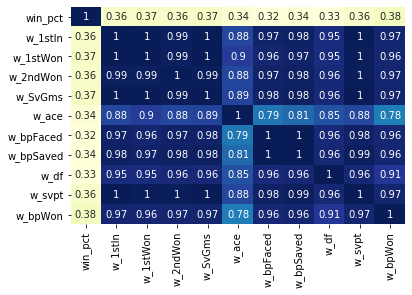

In [10]:
table_corr = pd.DataFrame(table,columns=['win_pct', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_ace', 
                                                  'w_bpFaced', 'w_bpSaved', 'w_df', 'w_svpt', 'w_bpWon'])

corrMatrix = table_corr.corr()
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu', robust=True, cbar=False)
plt.show()
# plt.savefig('figures/heatmap1.png')

# Part 1: Calculate Pythagorean Win %'s per Variable

In [11]:
def pythagorean(w,l):
    win = w**2 / (w**2 + l**2)
    return win

In [12]:
data = table

w_metrics.append('w_bpWon')
l_metrics.append('l_bpWon')

for w, l in zip(w_metrics, l_metrics):
    data[w[2:]] = pythagorean(data[w],data[l])


In [13]:
data.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,bpWon
winner_name,,,,,,,,,,,,,,,,,,,,,
Novak Djokovic,662,108.0,0.859740,3838.0,3738.0,1612.0,2074.0,56446.0,59761.0,36770.0,...,0.513197,0.376599,0.471497,0.507852,0.565343,0.530625,0.515339,0.289863,0.226678,0.851360
Rafael Nadal,589,115.0,0.836648,2103.0,3923.0,1088.0,1818.0,49731.0,53298.0,33883.0,...,0.223223,0.263707,0.465420,0.519368,0.567354,0.493171,0.503447,0.329743,0.247606,0.850162
Roger Federer,570,113.0,0.834553,5436.0,3615.0,1071.0,1845.0,50607.0,55200.0,31802.0,...,0.693366,0.252038,0.456672,0.471092,0.546202,0.510265,0.510013,0.235052,0.190273,0.871690
Andy Murray,516,128.0,0.801242,4354.0,2865.0,1493.0,1890.0,48720.0,50996.0,28876.0,...,0.697844,0.384243,0.477187,0.461581,0.523297,0.581820,0.506824,0.346109,0.290910,0.780162
David Ferrer,484,208.0,0.699422,1910.0,2837.0,1784.0,1901.0,51057.0,53107.0,31859.0,...,0.311892,0.468282,0.480327,0.504493,0.528978,0.524789,0.507517,0.384843,0.349262,0.699756


In [14]:
pyth_col = data.columns.tolist()
del pyth_col[0:2]
del pyth_col[1:21]
pyth_col

['win_pct',
 'ace',
 'df',
 'svpt',
 '1stIn',
 '1stWon',
 '2ndWon',
 'SvGms',
 'bpSaved',
 'bpFaced',
 'bpWon']

In [15]:
#alter to positive correlation

data['df'] = 1 - data['df']
data['bpSaved'] = 1 - data['bpSaved']
data['bpFaced'] = 1 - data['bpFaced']
data.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,bpWon
winner_name,,,,,,,,,,,,,,,,,,,,,
Novak Djokovic,662,108.0,0.859740,3838.0,3738.0,1612.0,2074.0,56446.0,59761.0,36770.0,...,0.513197,0.623401,0.471497,0.507852,0.565343,0.530625,0.515339,0.710137,0.773322,0.851360
Rafael Nadal,589,115.0,0.836648,2103.0,3923.0,1088.0,1818.0,49731.0,53298.0,33883.0,...,0.223223,0.736293,0.465420,0.519368,0.567354,0.493171,0.503447,0.670257,0.752394,0.850162
Roger Federer,570,113.0,0.834553,5436.0,3615.0,1071.0,1845.0,50607.0,55200.0,31802.0,...,0.693366,0.747962,0.456672,0.471092,0.546202,0.510265,0.510013,0.764948,0.809727,0.871690
Andy Murray,516,128.0,0.801242,4354.0,2865.0,1493.0,1890.0,48720.0,50996.0,28876.0,...,0.697844,0.615757,0.477187,0.461581,0.523297,0.581820,0.506824,0.653891,0.709090,0.780162
David Ferrer,484,208.0,0.699422,1910.0,2837.0,1784.0,1901.0,51057.0,53107.0,31859.0,...,0.311892,0.531718,0.480327,0.504493,0.528978,0.524789,0.507517,0.615157,0.650738,0.699756


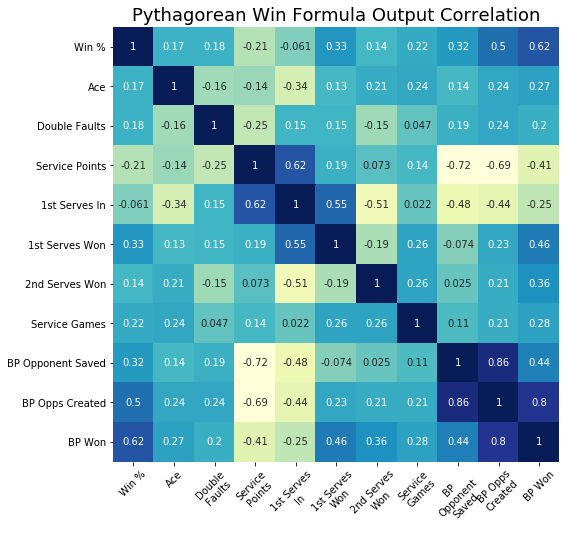

In [26]:
#correlation matrix

fig, cor = plt.subplots(figsize=(8,8))

data_corr = pd.DataFrame(data,columns=['win_pct', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon','SvGms',
                                       'bpSaved', 'bpFaced', 'bpWon'])

corrMatrix = data_corr.corr()
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu', robust=True, cbar=False)

lab=['Win %','Ace', 'Double Faults', 'Service Points','1st Serves In','1st Serves Won','2nd Serves Won', 'Service Games',
     'BP Opponent Saved','BP Opps Created','BP Won']
lab_wrap = [fill(l, 10) for l in lab]
cor.set_xticklabels(lab_wrap, fontsize=10, rotation=45)
cor.set_yticklabels(lab, fontsize=10, rotation=0)
plt.title('Pythagorean Win Formula Output Correlation', fontsize=18)

plt.savefig('Pythagorean Correlation.png', bbox_inches='tight')
plt.show()

In [28]:
data['v_ace'] = data['ace'] - data['win_pct']
data['v_df'] = data['df'] - data['win_pct']
data['v_svpt'] = data['svpt'] - data['win_pct']
data['v_1stIn'] = data['1stIn'] - data['win_pct']
data['v_1stWon'] = data['1stWon'] - data['win_pct']
data['v_2ndWon'] = data['2ndWon'] - data['win_pct']
data['v_SvGms'] = data['SvGms'] - data['win_pct']
data['v_bpSaved'] = data['bpSaved'] - data['win_pct']
data['v_bpFaced'] = data['bpFaced'] - data['win_pct']
data['v_bpWon'] = data['bpWon'] - data['win_pct']

data.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,v_ace,v_df,v_svpt,v_1stIn,v_1stWon,v_2ndWon,v_SvGms,v_bpSaved,v_bpFaced,v_bpWon
winner_name,,,,,,,,,,,,,,,,,,,,,
Novak Djokovic,662,108.0,0.859740,3838.0,3738.0,1612.0,2074.0,56446.0,59761.0,36770.0,...,-0.346543,-0.236340,-0.388244,-0.351888,-0.294397,-0.329115,-0.344402,-0.149603,-0.086418,-0.008380
Rafael Nadal,589,115.0,0.836648,2103.0,3923.0,1088.0,1818.0,49731.0,53298.0,33883.0,...,-0.613425,-0.100354,-0.371228,-0.317280,-0.269294,-0.343477,-0.333201,-0.166390,-0.084253,0.013515
Roger Federer,570,113.0,0.834553,5436.0,3615.0,1071.0,1845.0,50607.0,55200.0,31802.0,...,-0.141187,-0.086591,-0.377881,-0.363461,-0.288352,-0.324289,-0.324541,-0.069606,-0.024827,0.037137
Andy Murray,516,128.0,0.801242,4354.0,2865.0,1493.0,1890.0,48720.0,50996.0,28876.0,...,-0.103398,-0.185485,-0.324055,-0.339662,-0.277945,-0.219422,-0.294418,-0.147351,-0.092152,-0.021080
David Ferrer,484,208.0,0.699422,1910.0,2837.0,1784.0,1901.0,51057.0,53107.0,31859.0,...,-0.387530,-0.167704,-0.219095,-0.194929,-0.170443,-0.174633,-0.191905,-0.084265,-0.048684,0.000334


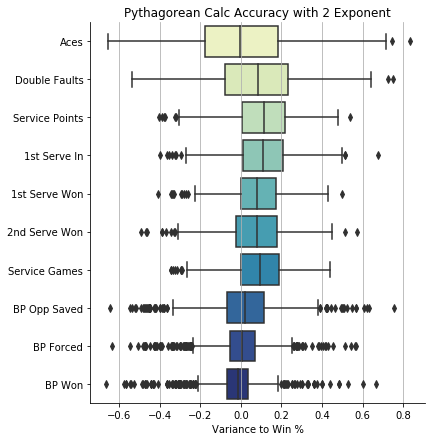

In [29]:
key_vars = data[['v_ace','v_df','v_svpt','v_1stIn','v_1stWon','v_2ndWon','v_SvGms','v_bpSaved','v_bpFaced','v_bpWon']]
box_data = pd.melt(key_vars)

f, bx = plt.subplots(figsize=(6, 7))
box = sns.boxplot(x="value", y="variable", data=box_data, palette='YlGnBu')
sns.despine()
box.set(yticklabels=['Aces','Double Faults','Service Points','1st Serve In', '1st Serve Won', '2nd Serve Won',
                     'Service Games','BP Opp Saved','BP Forced','BP Won'], ylabel='', xlabel='Variance to Win %', 
                     title='Pythagorean Calc Accuracy with 2 Exponent')
bx.xaxis.grid(True)

plt.savefig('Pyth Calc Accuracy by Var.png', bbox_inches='tight')

In [ ]:
# boxplot stats
from matplotlib.cbook import boxplot_stats

# bpSaved_stats = boxplot_stats(box_data['value'])
# bpSaved_stats = boxplot_stats(box_data['variable' == 'v_bpSaved'])
# bpFaced_stats = boxplot_stats(data['v_bpFaced'])
# # bpWon_stats = boxplot_stats(data['v_bpWon'])
# # print('BP Opp Saved: \n', bpSaved_stats)
# print('BP Forced: \n', bpFaced_stats)
# print('BP Won: \n', bpWon_stats)

#Distribution for Won is more concentrated
#calc RMSE for 3 vars and land on # BP Won

#then calc new exponent

In [30]:
# calc RMSE for each var
var = []
for v in key_vars:
    var.append(v[2:])
print(var)

for v in var:
    data['rmse_'+v] = data['v_'+v]**2
    
rmse_data=[]
for v in var:
    e = data['rmse_'+v].sum(axis=0) / len(data)
    rmse_data.append([v, np.sqrt(e)])
rmse_data = pd.DataFrame(rmse_data, columns=['Variable','RMSE'])
rmse_data = pd.DataFrame.sort_values(rmse_data, by='RMSE', ascending=True)
rmse_data = rmse_data.set_index('Variable')


rmse_data

['ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced', 'bpWon']


,RMSE
Variable,
bpWon,0.135148
bpFaced,0.135609
1stWon,0.139073
SvGms,0.149366
2ndWon,0.156177
bpSaved,0.167718
1stIn,0.168254
svpt,0.168706
df,0.210352


## Test on 2019 data

In [31]:
# load 2019 data

test_data = pd.read_csv("Week 4 Data/atp_matches_2019.csv")
test_data.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2776,2019-M-DC-2019-QLS-M-SUI-RUS-01,Davis Cup QLS R1: SUI vs RUS,Hard,4,D,20190201,2,111575,NaN,NaN,...,47.0,32.0,14.0,10.0,5.0,8.0,11.0,2880.0,362.0,56.0
2777,2019-M-DC-2019-QLS-M-SUI-RUS-01,Davis Cup QLS R1: SUI vs RUS,Hard,4,D,20190201,4,111575,NaN,NaN,...,94.0,65.0,27.0,17.0,15.0,17.0,11.0,2880.0,142.0,389.0
2778,2019-M-DC-2019-QLS-M-SWE-COL-01,Davis Cup QLS R1: SWE vs COL,Clay,4,D,20190201,1,105053,NaN,NaN,...,33.0,20.0,7.0,9.0,1.0,5.0,251.0,190.0,116.0,485.0
2779,2019-M-DC-2019-QLS-M-SWE-COL-01,Davis Cup QLS R1: SWE vs COL,Clay,4,D,20190201,2,123755,NaN,NaN,...,31.0,14.0,9.0,7.0,2.0,6.0,228.0,224.0,194.0,267.0
2780,2019-M-DC-2019-QLS-M-SWE-COL-01,Davis Cup QLS R1: SWE vs COL,Clay,4,D,20190201,4,105292,NaN,NaN,...,29.0,17.0,8.0,9.0,4.0,9.0,337.0,72.0,116.0,485.0


In [32]:
df_win = pd.pivot_table(test_data, index='winner_name', values='winner_id', aggfunc='count')
df_los = pd.pivot_table(test_data, index='loser_name', values='loser_id', aggfunc='count')
df_cnt = pd.merge(df_win, df_los, how="left", left_index=True, right_index=True)
df_cnt['win_pct'] = df_cnt['winner_id'] / (df_cnt['winner_id'] + df_cnt['loser_id'])

df_sum_w = pd.pivot_table(test_data, index='winner_name', values=col[27:45], aggfunc='sum')
df_sum_l = pd.pivot_table(test_data, index='loser_name', values=col[27:45], aggfunc='sum')
# table = pd.concat([df_cnt, df_sum], axis=1)
table2 = pd.merge(df_cnt, df_sum_w, how="left", left_index=True, right_index=True)
table2 = pd.merge(table2, df_sum_l, how="left", left_index=True, right_index=True)
table2 = pd.DataFrame.sort_values(table2, by='winner_id', ascending=False)

w_metrics = col[27:36]
l_metrics = col[36:45]


for w,l in zip(w_metrics,l_metrics):
    table2[w] = table2[w+'_x'] + table2[l+'_y']
    table2[l] = table2[l+'_x'] + table2[w+'_y']
    table2 = table2.drop([w+'_x', w+'_y', l+'_x', l+'_y'], axis=1)
table2['w_bpWon'] = table2['l_bpFaced'] - table2['l_bpSaved']
table2['l_bpWon'] = table2['w_bpFaced'] - table2['w_bpSaved']

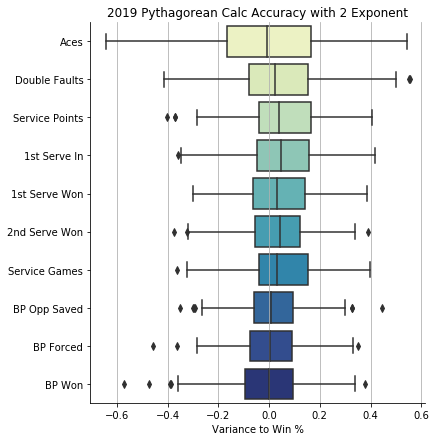

In [33]:
w_metrics.append('w_bpWon')
l_metrics.append('l_bpWon')

for w, l in zip(w_metrics, l_metrics):
    table2[w[2:]] = pythagorean(data[w],data[l])
    

table2['df'] = 1 - table2['df']
table2['bpSaved'] = 1 - table2['bpSaved']
table2['bpFaced'] = 1 - table2['bpFaced']
table2.head()


table2['v_ace'] = table2['ace'] - table2['win_pct']
table2['v_df'] = table2['df'] - table2['win_pct']
table2['v_svpt'] = table2['svpt'] - table2['win_pct']
table2['v_1stIn'] = table2['1stIn'] - table2['win_pct']
table2['v_1stWon'] = table2['1stWon'] - table2['win_pct']
table2['v_2ndWon'] = table2['2ndWon'] - table2['win_pct']
table2['v_SvGms'] = table2['SvGms'] - table2['win_pct']
table2['v_bpSaved'] = table2['bpSaved'] - table2['win_pct']
table2['v_bpFaced'] = table2['bpFaced'] - table2['win_pct']
table2['v_bpWon'] = table2['bpWon'] - table2['win_pct']


key_vars = table2[['v_ace','v_df','v_svpt','v_1stIn','v_1stWon','v_2ndWon','v_SvGms','v_bpSaved','v_bpFaced','v_bpWon']]
box_data = pd.melt(key_vars)

f, bx = plt.subplots(figsize=(6, 7))
box = sns.boxplot(x="value", y="variable", data=box_data, palette='YlGnBu')
sns.despine()
box.set(yticklabels=['Aces','Double Faults','Service Points','1st Serve In', '1st Serve Won', '2nd Serve Won',
                     'Service Games','BP Opp Saved','BP Forced','BP Won'], ylabel='', xlabel='Variance to Win %', 
                     title='2019 Pythagorean Calc Accuracy with 2 Exponent')
bx.xaxis.grid(True)
plt.savefig('2019 Pyth Calc Accuracy by Var.png', bbox_inches='tight')

In [34]:
# calc RMSE for each var

for v in var:
    table2['rmse_'+v] = table2['v_'+v]**2
    
rmse_data2=[]
for v in var:
    e = table2['rmse_'+v].sum(axis=0) / len(table2)
    rmse_data2.append([v, np.sqrt(e)])
rmse_data2 = pd.DataFrame(rmse_data2, columns=['Variable','RMSE'])
rmse_data2 = pd.DataFrame.sort_values(rmse_data2, by='RMSE', ascending=True)
rmse_data2 = rmse_data2.set_index('Variable')


rmse_data2

,RMSE
Variable,
bpFaced,0.114401
bpSaved,0.118605
1stWon,0.126751
SvGms,0.129255
2ndWon,0.131420
bpWon,0.136100
svpt,0.141080
1stIn,0.143155
df,0.185764


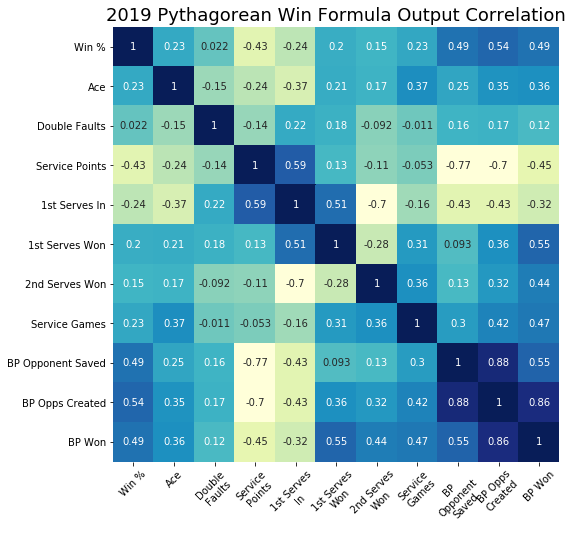

In [35]:
fig, cor2 = plt.subplots(figsize=(8,8))

data_corr = pd.DataFrame(table2,columns=['win_pct', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon','SvGms',
                                       'bpSaved', 'bpFaced', 'bpWon'])

corrMatrix = data_corr.corr()
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu', robust=True, cbar=False)

lab=['Win %','Ace', 'Double Faults', 'Service Points','1st Serves In','1st Serves Won','2nd Serves Won', 'Service Games',
     'BP Opponent Saved','BP Opps Created','BP Won']
lab_wrap = [fill(l, 10) for l in lab]
cor2.set_xticklabels(lab_wrap, fontsize=10, rotation=45)
cor2.set_yticklabels(lab, fontsize=10, rotation=0)
plt.title('2019 Pythagorean Win Formula Output Correlation', fontsize=18)

plt.savefig('2019 Pythagorean Correlation.png', bbox_inches='tight')
plt.show()

# Part 2: Player Comparison

In [36]:
#compare players with higher 1st serve in percentages 
#create metric

pt2 = table2
pt2['1st_pct'] = pt2['w_1stIn'] / pt2['w_svpt']
pt2['total_matches'] = pt2['winner_id'] + pt2['loser_id']
pt2 = pd.DataFrame.sort_values(pt2, by='1st_pct', ascending=False)
pt2.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,rmse_svpt,rmse_1stIn,rmse_1stWon,rmse_2ndWon,rmse_SvGms,rmse_bpSaved,rmse_bpFaced,rmse_bpWon,1st_pct,total_matches
winner_name,,,,,,,,,,,,,,,,,,,,,
Joao Domingues,2,2.0,0.500000,0.0,4.0,0.0,7.0,200.0,191.0,157.0,...,0.000431,0.003140,0.000324,0.025670,0.000043,0.000000,0.006076,0.033785,0.785000,4.0
Hugo Dellien,12,16.0,0.428571,60.0,120.0,44.0,80.0,2046.0,2062.0,1479.0,...,0.033063,0.075433,0.020898,0.006827,0.005102,0.037142,0.068249,0.129126,0.722874,28.0
Alejandro Gonzalez,1,1.0,0.500000,5.0,17.0,4.0,7.0,134.0,99.0,96.0,...,0.000261,0.000332,0.001513,0.001414,0.000017,0.010411,0.030148,0.067520,0.716418,2.0
John Isner,29,17.0,0.630435,1003.0,437.0,80.0,171.0,3719.0,3909.0,2662.0,...,0.017072,0.006507,0.005269,0.056846,0.015496,0.002926,0.001383,0.000002,0.715784,46.0
Andrej Martin,1,1.0,0.500000,0.0,0.0,1.0,5.0,55.0,59.0,39.0,...,0.000017,0.000681,0.001242,0.003769,0.000047,0.004405,0.000892,0.000493,0.709091,2.0


In [37]:
pt2.describe()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,rmse_svpt,rmse_1stIn,rmse_1stWon,rmse_2ndWon,rmse_SvGms,rmse_bpSaved,rmse_bpFaced,rmse_bpWon,1st_pct,total_matches
count,241.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,1.950000e+02,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,211.000000,221.000000
mean,11.539419,11.773756,0.457080,158.696833,157.619910,71.398190,71.837104,1917.606335,1920.755656,1191.276018,...,2.459883e-02,2.532765e-02,0.019856,0.021345,0.020648,0.017386,0.016175,0.022893,0.618656,24.248869
std,13.303802,9.152418,0.134942,190.253093,143.730652,72.283877,63.541759,1710.023813,1743.590093,1070.858259,...,3.360990e-02,3.399252e-02,0.026770,0.028750,0.028469,0.026772,0.026124,0.039226,0.047528,21.357489
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.941070e-07,1.335176e-07,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.394737,2.000000
25%,1.000000,3.000000,0.333333,18.000000,28.000000,13.000000,13.000000,337.000000,328.000000,197.000000,...,1.521317e-03,2.185787e-03,0.002024,0.002063,0.001167,0.001481,0.001590,0.001590,0.592897,4.000000
50%,5.000000,10.000000,0.478261,82.000000,116.000000,46.000000,54.000000,1284.000000,1294.000000,800.000000,...,9.024545e-03,1.068087e-02,0.007846,0.009410,0.007468,0.005727,0.007040,0.008801,0.620345,17.000000
75%,20.000000,21.000000,0.522727,235.000000,269.000000,116.000000,128.000000,3325.000000,3414.000000,2076.000000,...,3.318662e-02,3.949611e-02,0.026514,0.029724,0.028341,0.021382,0.019026,0.028380,0.647910,42.000000
max,59.000000,31.000000,0.867647,1065.000000,538.000000,415.000000,215.000000,6479.000000,6517.000000,4135.000000,...,1.660991e-01,1.749245e-01,0.147786,0.151832,0.158183,0.197975,0.210358,0.325532,0.785000,80.000000


In [38]:
#determine average rank for each player in 2019

data19 = test_data

df_rank_w = pd.pivot_table(data19, index='winner_name', values='winner_rank', aggfunc='sum')
df_rank_l = pd.pivot_table(data19, index='loser_name', values='loser_rank', aggfunc='sum')
df_rank = pd.merge(df_rank_w, df_rank_l, how="left", left_index=True, right_index=True)
df_rank = pd.merge(df_rank, pt2['total_matches'], how="left", left_index=True, right_index=True)

df_rank['avg_rank'] = (df_rank['winner_rank'] + df_rank['loser_rank']) / df_rank['total_matches']
df_rank = df_rank.drop(columns=['winner_rank','loser_rank','total_matches'])

df_rank.head()


,avg_rank
winner_name,
Adrian Mannarino,51.679245
Adrian Menendez Maceiras,130.750000
Ajeet Rai,744.000000
Albert Ramos,77.870370
Alejandro Davidovich Fokina,148.400000


In [39]:
pt2_rank2 = pt2
pt2_rank2 = pd.merge(pt2_rank2, df_rank['avg_rank'], how="left", left_index=True, right_index=True)

pt2_rank2.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,rmse_1stIn,rmse_1stWon,rmse_2ndWon,rmse_SvGms,rmse_bpSaved,rmse_bpFaced,rmse_bpWon,1st_pct,total_matches,avg_rank
winner_name,,,,,,,,,,,,,,,,,,,,,
Joao Domingues,2,2.0,0.500000,0.0,4.0,0.0,7.0,200.0,191.0,157.0,...,0.003140,0.000324,0.025670,0.000043,0.000000,0.006076,0.033785,0.785000,4.0,205.250000
Hugo Dellien,12,16.0,0.428571,60.0,120.0,44.0,80.0,2046.0,2062.0,1479.0,...,0.075433,0.020898,0.006827,0.005102,0.037142,0.068249,0.129126,0.722874,28.0,93.214286
Alejandro Gonzalez,1,1.0,0.500000,5.0,17.0,4.0,7.0,134.0,99.0,96.0,...,0.000332,0.001513,0.001414,0.000017,0.010411,0.030148,0.067520,0.716418,2.0,403.500000
John Isner,29,17.0,0.630435,1003.0,437.0,80.0,171.0,3719.0,3909.0,2662.0,...,0.006507,0.005269,0.056846,0.015496,0.002926,0.001383,0.000002,0.715784,46.0,12.521739
Andrej Martin,1,1.0,0.500000,0.0,0.0,1.0,5.0,55.0,59.0,39.0,...,0.000681,0.001242,0.003769,0.000047,0.004405,0.000892,0.000493,0.709091,2.0,147.500000


## Compare Top 3 1st Serve In %'s across all players

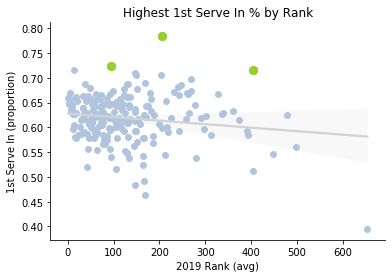

In [40]:
# scatterplot of top 3 1st serve in compared to rest of players
# expect to see negative correlation between rank and 1st serve %

row = pt2_rank2.index.tolist()

pt2_rank2_top3 = pt2_rank2.iloc[0:3]
pt2_rank2_rest = pt2_rank2.iloc[3:]

sns.regplot(x="avg_rank", y="1st_pct", data=pt2_rank2, marker='', color='lightgray')
plt.scatter(x=pt2_rank2_rest["avg_rank"], y=pt2_rank2_rest["1st_pct"], c='lightsteelblue', s=35)
plt.scatter(x=pt2_rank2_top3["avg_rank"], y=pt2_rank2_top3["1st_pct"], c='yellowgreen', s=70)

sns.despine()
plt.ylabel('1st Serve In (proportion)')
plt.xlabel('2019 Rank (avg)')
plt.title('Highest 1st Serve In % by Rank')

plt.show()

In [41]:
#keep players who played top 25% (~42) number of total matches

pt2_top = pt2[pt2['total_matches'] >= 42]
pt2_top.head(10)

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,rmse_svpt,rmse_1stIn,rmse_1stWon,rmse_2ndWon,rmse_SvGms,rmse_bpSaved,rmse_bpFaced,rmse_bpWon,1st_pct,total_matches
winner_name,,,,,,,,,,,,,,,,,,,,,
John Isner,29,17.0,0.630435,1003.0,437.0,80.0,171.0,3719.0,3909.0,2662.0,...,0.017072,0.006507,0.005269,0.056846,0.015496,0.002926,0.001383,0.000002,0.715784,46.0
Dusan Lajovic,21,27.0,0.437500,163.0,243.0,78.0,145.0,3827.0,3640.0,2632.0,...,0.004973,0.010681,0.005813,0.000439,0.003859,0.000143,0.000279,0.000577,0.687745,48.0
Pablo Carreno Busta,30,22.0,0.576923,235.0,527.0,98.0,189.0,4350.0,4520.0,2954.0,...,0.005552,0.001884,0.003685,0.008730,0.005940,0.007302,0.005070,0.002664,0.679080,52.0
Alexander Zverev,43,24.0,0.641791,718.0,290.0,388.0,190.0,5381.0,5694.0,3600.0,...,0.021591,0.017394,0.012948,0.023260,0.020021,0.005592,0.002239,0.000082,0.669021,67.0
Jordan Thompson,26,22.0,0.541667,296.0,331.0,89.0,134.0,4003.0,3944.0,2671.0,...,0.002074,0.001457,0.003651,0.010958,0.001631,0.007695,0.018080,0.040150,0.667250,48.0
Guido Pella,36,26.0,0.580645,300.0,386.0,130.0,198.0,5167.0,5205.0,3429.0,...,0.007396,0.002737,0.005833,0.013977,0.006504,0.013343,0.013942,0.014990,0.663635,62.0
Roberto Bautista Agut,42,23.0,0.646154,254.0,538.0,111.0,184.0,5044.0,5499.0,3334.0,...,0.022909,0.010680,0.010425,0.029555,0.018278,0.012470,0.006079,0.000793,0.660983,65.0
Novak Djokovic,58,11.0,0.840580,392.0,373.0,168.0,190.0,5015.0,5341.0,3307.0,...,0.136222,0.110707,0.075755,0.096072,0.105782,0.017015,0.004524,0.000116,0.659422,69.0
Filip Krajinovic,31,18.0,0.632653,251.0,381.0,72.0,154.0,4009.0,4134.0,2638.0,...,0.018086,0.011691,0.021526,0.032354,0.018955,0.016759,0.030879,0.057821,0.658019,49.0


In [42]:
pt2_rank = pt2_top
pt2_rank = pd.merge(pt2_rank, df_rank['avg_rank'], how="left", left_index=True, right_index=True)

pt2_rank.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,...,rmse_1stIn,rmse_1stWon,rmse_2ndWon,rmse_SvGms,rmse_bpSaved,rmse_bpFaced,rmse_bpWon,1st_pct,total_matches,avg_rank
winner_name,,,,,,,,,,,,,,,,,,,,,
John Isner,29,17.0,0.630435,1003.0,437.0,80.0,171.0,3719.0,3909.0,2662.0,...,0.006507,0.005269,0.056846,0.015496,0.002926,0.001383,0.000002,0.715784,46.0,12.521739
Dusan Lajovic,21,27.0,0.437500,163.0,243.0,78.0,145.0,3827.0,3640.0,2632.0,...,0.010681,0.005813,0.000439,0.003859,0.000143,0.000279,0.000577,0.687745,48.0,37.437500
Pablo Carreno Busta,30,22.0,0.576923,235.0,527.0,98.0,189.0,4350.0,4520.0,2954.0,...,0.001884,0.003685,0.008730,0.005940,0.007302,0.005070,0.002664,0.679080,52.0,47.884615
Alexander Zverev,43,24.0,0.641791,718.0,290.0,388.0,190.0,5381.0,5694.0,3600.0,...,0.017394,0.012948,0.023260,0.020021,0.005592,0.002239,0.000082,0.669021,67.0,4.850746
Jordan Thompson,26,22.0,0.541667,296.0,331.0,89.0,134.0,4003.0,3944.0,2671.0,...,0.001457,0.003651,0.010958,0.001631,0.007695,0.018080,0.040150,0.667250,48.0,62.000000


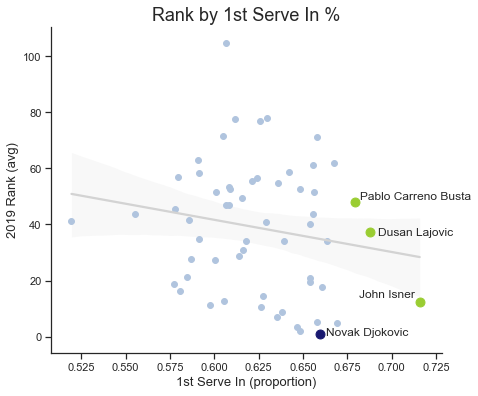

In [116]:
# scatterplot of top 3 1st serve in compared to rest of players
# expect to see negative correlation between rank and 1st serve %

sns.set(rc={'figure.figsize':(7,6)})
sns.set_style("ticks")

row = pt2_rank.index.tolist()
best = 'Novak Djokovic'

pt2_rank_top3 = pt2_rank.iloc[0:3]
pt2_rank_rest = pt2_rank.iloc[3:]
pt2_rank_best = pt2_rank.loc[best]

sns.regplot(y="avg_rank", x="1st_pct", data=pt2_rank, marker='', color='lightgray')
plt.scatter(y=pt2_rank_rest["avg_rank"], x=pt2_rank_rest["1st_pct"], c='lightsteelblue', s=35)
plt.scatter(y=pt2_rank_top3["avg_rank"], x=pt2_rank_top3["1st_pct"], c='yellowgreen', s=80)
plt.scatter(y=pt2_rank_best["avg_rank"], x=pt2_rank_best["1st_pct"], c='midnightblue', s=80)
plt.annotate(row[0],(.713,14), ha='right')
plt.annotate(row[1],(.692,36))
plt.annotate(row[2],(.682,49))
plt.annotate(best,(.663,.5))

sns.despine()
plt.xlabel('1st Serve In (proportion)',  fontsize=13)
plt.ylabel('2019 Rank (avg)',  fontsize=13)
plt.title('Rank by 1st Serve In %', fontsize=18)

plt.savefig('2019 1st Serve In x by Rank.png', bbox_inches='tight')
plt.show()

#correlation doesn't appear to be very strong

In [123]:
#Djokovic's 1st Serve In % rank
print(row.index(best)+1)
pt2_rank_best

8


winner_id          58.000000
loser_id           11.000000
win_pct             0.840580
w_ace             392.000000
l_ace             373.000000
w_df              168.000000
l_df              190.000000
w_svpt           5015.000000
l_svpt           5341.000000
w_1stIn          3307.000000
l_1stIn          3293.000000
w_1stWon         2515.000000
l_1stWon         2167.000000
w_2ndWon          975.000000
l_2ndWon          934.000000
w_SvGms           853.000000
l_SvGms           824.000000
w_bpSaved         184.000000
l_bpSaved         275.000000
w_bpFaced         287.000000
l_bpFaced         539.000000
w_bpWon           264.000000
l_bpWon           103.000000
ace                 0.513197
df                  0.623401
svpt                0.471497
1stIn               0.507852
1stWon              0.565343
2ndWon              0.530625
SvGms               0.515339
bpSaved             0.710137
bpFaced             0.773322
bpWon               0.851360
v_ace              -0.327382
v_df          

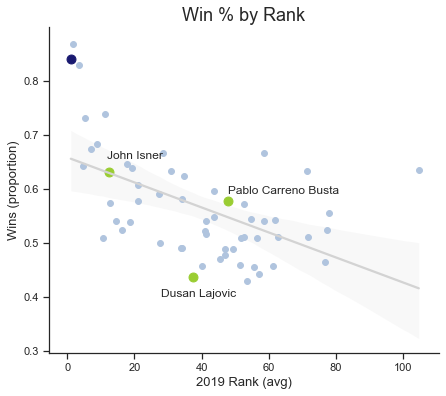

In [56]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set_style("ticks")

sns.regplot(x="avg_rank", y="win_pct", data=pt2_rank, marker='', color='lightgray')
plt.scatter(x=pt2_rank_rest["avg_rank"], y=pt2_rank_rest["win_pct"], c='lightsteelblue', s=35)
plt.scatter(x=pt2_rank_top3["avg_rank"], y=pt2_rank_top3["win_pct"], c='yellowgreen', s=80)
plt.scatter(x=pt2_rank_best["avg_rank"], y=pt2_rank_best["win_pct"], c='midnightblue', s=80)
plt.annotate(row[0],(12,.655))
plt.annotate(row[1],(28,.40))
plt.annotate(row[2],(48,.59))

sns.despine()
plt.ylabel('Wins (proportion)', fontsize=13)
plt.xlabel('2019 Rank (avg)',  fontsize=13)
plt.title('Win % by Rank', fontsize=18)

plt.savefig('2019 Win % by Rank.png', bbox_inches='tight')
plt.show()


## Compare across 4 metrics
Compare on:
 - Aces (they got high 1st serves in, but were these serves competitive?)
 - 1st Serve Win (were they able to win the serves they got in, indicating strength of return & game play?)
 - Breakpoint Opportunities Given (how many opps have their opponents had to break their serve?)
 - Service Points per Game (how quickly have their service games finished?)

In [46]:
# standardize key metrics

pt2_rank['ace_pct'] = pt2_rank['w_ace'] / pt2_rank['w_svpt']
pt2_rank['1st_win_pct'] = pt2_rank['w_1stWon'] / pt2_rank['w_1stIn']
pt2_rank['bpOpps_pct'] = pt2_rank['l_bpFaced'] / pt2_rank['w_svpt']
pt2_rank['svpt_pct'] = pt2_rank['w_svpt'] / pt2_rank['w_SvGms']
pt2_rank_top3 = pt2_rank.iloc[0:3]
pt2_rank_rest = pt2_rank.iloc[3:]
pt2_rank_best = pt2_rank.loc[best]

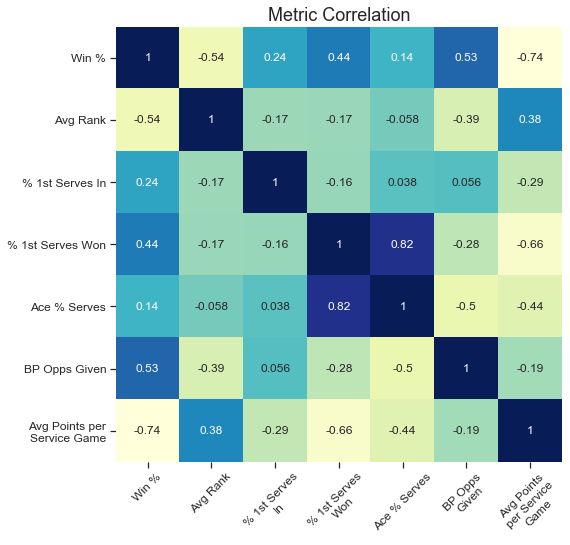

In [51]:
fig, cor3 = plt.subplots(figsize=(8,8))

data_corr = pd.DataFrame(pt2_rank,columns=['win_pct', 'avg_rank', '1st_pct', '1st_win_pct', 'ace_pct',  
                                           'bpOpps_pct', 'svpt_pct'])

corrMatrix = data_corr.corr()
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu', robust=True, cbar=False)

lab=['Win %','Avg Rank', '% 1st Serves In','% 1st Serves Won', 'Ace % Serves','BP Opps Given', 'Avg Points per Service Game']
lab_wrapx = [fill(l, 12) for l in lab]
lab_wrapy = [fill(l, 16) for l in lab]
cor3.set_xticklabels(lab_wrapx, fontsize=12, rotation=45)
cor3.set_yticklabels(lab_wrapy, fontsize=12, rotation=0)
plt.title('Metric Correlation', fontsize=18)

plt.savefig('Metric Correlation.png', bbox_inches='tight')
plt.show()

### Aces

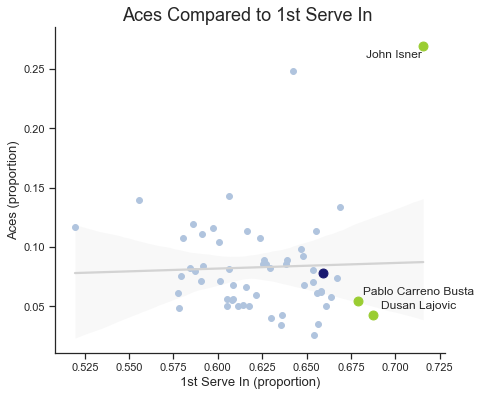

In [60]:
# aces % service points

sns.set(rc={'figure.figsize':(7,6)})
sns.set_style("ticks")

sns.regplot(y="ace_pct", x="1st_pct", data=pt2_rank, marker='', color='lightgray')
plt.scatter(y=pt2_rank_rest["ace_pct"], x=pt2_rank_rest["1st_pct"], c='lightsteelblue', s=35)
plt.scatter(y=pt2_rank_top3["ace_pct"], x=pt2_rank_top3["1st_pct"], c='yellowgreen', s=80)
plt.scatter(y=pt2_rank_best["ace_pct"], x=pt2_rank_best["1st_pct"], c='midnightblue', s=80)
plt.annotate(row[0],(.715,.26), ha='right')
plt.annotate(row[1],(.692,.048))
plt.annotate(row[2],(.682,.06))

sns.despine()
plt.xlabel('1st Serve In (proportion)',  fontsize=13)
plt.ylabel('Aces (proportion)',  fontsize=13)
plt.title('Aces Compared to 1st Serve In ', fontsize=18)

plt.savefig('2019 1st Serve In x Aces.png', bbox_inches='tight')
plt.show()


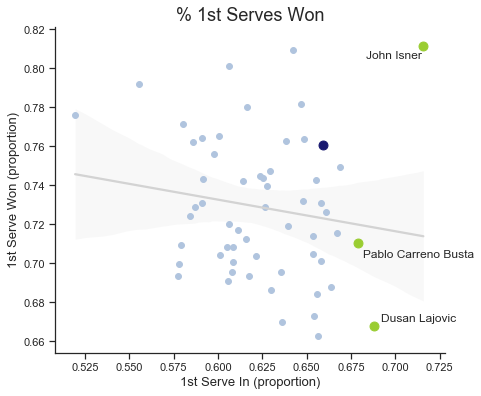

In [63]:
# % 1st serves won

sns.set(rc={'figure.figsize':(7,6)})
sns.set_style("ticks")

sns.regplot(y="1st_win_pct", x="1st_pct", data=pt2_rank, marker='', color='lightgray')
plt.scatter(y=pt2_rank_rest["1st_win_pct"], x=pt2_rank_rest["1st_pct"], c='lightsteelblue', s=35)
plt.scatter(y=pt2_rank_top3["1st_win_pct"], x=pt2_rank_top3["1st_pct"], c='yellowgreen', s=80)
plt.scatter(y=pt2_rank_best["1st_win_pct"], x=pt2_rank_best["1st_pct"], c='midnightblue', s=80)
plt.annotate(row[0],(.715,.805), ha='right')
plt.annotate(row[1],(.692,.67))
plt.annotate(row[2],(.682,.703))

sns.despine()
plt.xlabel('1st Serve In (proportion)',  fontsize=13)
plt.ylabel('1st Serve Won (proportion)',  fontsize=13)
plt.title('% 1st Serves Won', fontsize=18)

plt.savefig('2019 % 1st Serves Won.png', bbox_inches='tight')
plt.show()

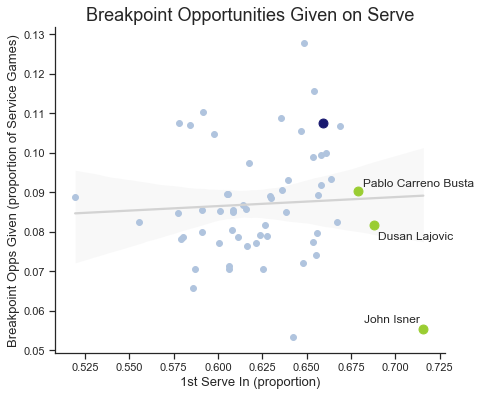

In [67]:
# breakpoint opportunities given

sns.set(rc={'figure.figsize':(7,6)})
sns.set_style("ticks")

sns.regplot(y="bpOpps_pct", x="1st_pct", data=pt2_rank, marker='', color='lightgray')
plt.scatter(y=pt2_rank_rest["bpOpps_pct"], x=pt2_rank_rest["1st_pct"], c='lightsteelblue', s=35)
plt.scatter(y=pt2_rank_top3["bpOpps_pct"], x=pt2_rank_top3["1st_pct"], c='yellowgreen', s=80)
plt.scatter(y=pt2_rank_best["bpOpps_pct"], x=pt2_rank_best["1st_pct"], c='midnightblue', s=80)
plt.annotate(row[0],(.714,.057), ha='right')
plt.annotate(row[1],(.69,.078))
plt.annotate(row[2],(.682,.0915))

sns.despine()
plt.xlabel('1st Serve In (proportion)',  fontsize=13)
plt.ylabel('Breakpoint Opps Given (proportion of Service Games)',  fontsize=13)
plt.title('Breakpoint Opportunities Given on Serve', fontsize=18)

plt.savefig('2019 Breakpoint Opportunities Given.png', bbox_inches='tight')
plt.show()

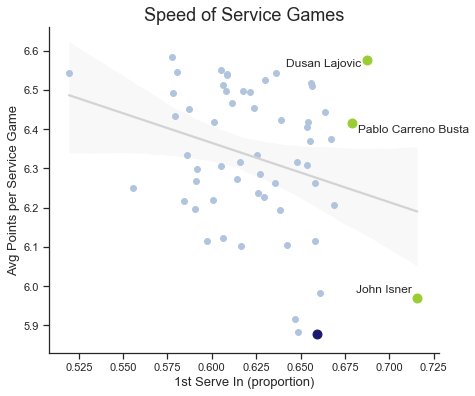

In [76]:
# service points per game

sns.set(rc={'figure.figsize':(7,6)})
sns.set_style("ticks")

sns.regplot(y="svpt_pct", x="1st_pct", data=pt2_rank, marker='', color='lightgray')
plt.scatter(y=pt2_rank_rest["svpt_pct"], x=pt2_rank_rest["1st_pct"], c='lightsteelblue', s=35)
plt.scatter(y=pt2_rank_top3["svpt_pct"], x=pt2_rank_top3["1st_pct"], c='yellowgreen', s=80)
plt.scatter(y=pt2_rank_best["svpt_pct"], x=pt2_rank_best["1st_pct"], c='midnightblue', s=80)
plt.annotate(row[0],(.713,5.985), ha='right')
plt.annotate(row[1],(.684,6.56), ha='right')
plt.annotate(row[2],(.6822,6.392))

sns.despine()
plt.xlabel('1st Serve In (proportion)',  fontsize=13)
plt.ylabel('Avg Points per Service Game',  fontsize=13)
plt.title('Speed of Service Games', fontsize=18)

plt.savefig('2019 Service Game Speed.png', bbox_inches='tight')
plt.show()

In [110]:
pt2_svpt = pd.DataFrame.sort_values(pt2_rank, by='svpt_pct', ascending=True)
pt2_svpt.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_bpWon,l_bpWon,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,bpWon,v_ace,v_df,v_svpt,v_1stIn,v_1stWon,v_2ndWon,v_SvGms,v_bpSaved,v_bpFaced,v_bpWon,rmse_ace,rmse_df,rmse_svpt,rmse_1stIn,rmse_1stWon,rmse_2ndWon,rmse_SvGms,rmse_bpSaved,rmse_bpFaced,rmse_bpWon,1st_pct,total_matches,avg_rank,ace_pct,1st_win_pct,bpOpps_pct,svpt_pct
winner_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Novak Djokovic,58,11.0,0.840580,392.0,373.0,168.0,190.0,5015.0,5341.0,3307.0,3293.0,2515.0,2167.0,975.0,934.0,853.0,824.0,184.0,275.0,287.0,539.0,264.0,103.0,0.513197,0.623401,0.471497,0.507852,0.565343,0.530625,0.515339,0.710137,0.773322,0.851360,-0.327382,-0.217179,-0.369083,-0.332727,-0.275237,-0.309954,-0.325241,-0.130443,-0.067258,0.010781,0.107179,0.047167,0.136222,0.110707,0.075755,0.096072,0.105782,0.017015,0.004524,0.000116,0.659422,69.0,1.086957,0.078166,0.760508,0.107478,5.879250
Rafael Nadal,59,9.0,0.867647,310.0,417.0,120.0,145.0,4583.0,4935.0,2972.0,3178.0,2270.0,2063.0,960.0,775.0,779.0,748.0,153.0,326.0,225.0,586.0,260.0,72.0,0.223223,0.736293,0.465420,0.519368,0.567354,0.493171,0.503447,0.670257,0.752394,0.850162,-0.644424,-0.131354,-0.402227,-0.348279,-0.300293,-0.374476,-0.364201,-0.197390,-0.115253,-0.017485,0.415283,0.017254,0.161787,0.121299,0.090176,0.140232,0.132642,0.038963,0.013283,0.000306,0.648484,68.0,1.882353,0.067641,0.763795,0.127864,5.883184
Roger Federer,53,11.0,0.828125,460.0,274.0,97.0,175.0,4704.0,5173.0,3043.0,3211.0,2378.0,2165.0,986.0,981.0,795.0,789.0,172.0,293.0,242.0,496.0,203.0,70.0,0.693366,0.747962,0.456672,0.471092,0.546202,0.510265,0.510013,0.764948,0.809727,0.871690,-0.134759,-0.080163,-0.371453,-0.357033,-0.281923,-0.317860,-0.318112,-0.063177,-0.018398,0.043565,0.018160,0.006426,0.137977,0.127472,0.079481,0.101035,0.101195,0.003991,0.000338,0.001898,0.646896,64.0,3.593750,0.097789,0.781466,0.105442,5.916981
John Isner,29,17.0,0.630435,1003.0,437.0,80.0,171.0,3719.0,3909.0,2662.0,2456.0,2160.0,1910.0,606.0,844.0,623.0,619.0,97.0,146.0,134.0,206.0,60.0,37.0,0.846378,0.691077,0.499775,0.549767,0.557846,0.392011,0.505952,0.576345,0.593245,0.631857,0.215943,0.060643,-0.130660,-0.080668,-0.072589,-0.238423,-0.124483,-0.054089,-0.037190,0.001422,0.046632,0.003678,0.017072,0.006507,0.005269,0.056846,0.015496,0.002926,0.001383,0.000002,0.715784,46.0,12.521739,0.269696,0.811420,0.055391,5.969502
Roberto Bautista Agut,42,23.0,0.646154,254.0,538.0,111.0,184.0,5044.0,5499.0,3334.0,3309.0,2422.0,2352.0,960.0,1013.0,843.0,828.0,202.0,300.0,332.0,504.0,204.0,130.0,0.173511,0.692308,0.494798,0.542809,0.544051,0.474239,0.510958,0.534483,0.568183,0.617987,-0.472643,0.046154,-0.151356,-0.103345,-0.102103,-0.171915,-0.135196,-0.111671,-0.077971,-0.028166,0.223392,0.002130,0.022909,0.010680,0.010425,0.029555,0.018278,0.012470,0.006079,0.000793,0.660983,65.0,17.815385,0.050357,0.726455,0.099921,5.983393


# Part 3: Davis Cup
The Davis Cup is a team-based tennis tournament grouped by country. In 2019, USA lost during the Round Robin stage (1st round), where they played 3 matches against both, Canada and Italy. Although they won 2-1 against Italy, they lost 1-2 against Canada. What would it look like if John Isner was included on the USA team, instead of Reilly Opelka who lost both his matches in 2019?

https://www.daviscup.com/en/players/player.aspx?id=800335986

In [104]:
#Focus on match against Fabio Fognini (ITL), as the match against Canada resulted in 2 lost tie breaks

players = ['John Isner','Reilly Opelka','Fabio Fognini']

yrs = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
data_full = pd.DataFrame()
temp = pd.DataFrame()

for y in yrs:
    temp = pd.read_csv("Week 4 Data/atp_matches_" + str(y) + ".csv")
    temp['year'] = y
    data_full = temp if y == yrs[0] else df.append(temp, ignore_index=True)


df_win = pd.pivot_table(data_full, index='winner_name', values='winner_id', aggfunc='count')
df_los = pd.pivot_table(data_full, index='loser_name', values='loser_id', aggfunc='count')
df_cnt = pd.merge(df_win, df_los, how="left", left_index=True, right_index=True)
df_cnt['win_pct'] = df_cnt['winner_id'] / (df_cnt['winner_id'] + df_cnt['loser_id'])

df_sum_w = pd.pivot_table(data_full, index='winner_name', values=col[27:45], aggfunc='sum')
df_sum_l = pd.pivot_table(data_full, index='loser_name', values=col[27:45], aggfunc='sum')

davis = pd.merge(df_cnt, df_sum_w, how="left", left_index=True, right_index=True)
davis = pd.merge(davis, df_sum_l, how="left", left_index=True, right_index=True)
davis = pd.DataFrame.sort_values(davis, by='winner_id', ascending=False)

w_metrics = col[27:36]
l_metrics = col[36:45]


for w,l in zip(w_metrics,l_metrics):
    davis[w] = davis[w+'_x'] + davis[l+'_y']
    davis[l] = davis[l+'_x'] + davis[w+'_y']
    davis = davis.drop([w+'_x', w+'_y', l+'_x', l+'_y'], axis=1)
davis['w_bpWon'] = davis['l_bpFaced'] - davis['l_bpSaved']
davis['l_bpWon'] = davis['w_bpFaced'] - davis['w_bpSaved']

w_metrics.append('w_bpWon')
l_metrics.append('l_bpWon')

davis['1st_pct'] = davis['w_1stIn'] / davis['w_svpt']
davis['total_matches'] = davis['winner_id'] + davis['loser_id']
davis = pd.merge(davis, df_rank['avg_rank'], how="left", left_index=True, right_index=True)
davis['ace_pct'] = davis['w_ace'] / davis['w_svpt']
davis['return_pct'] = 1 - (davis['l_ace'] / davis['l_svpt'])
davis['1st_win_pct'] = davis['w_1stWon'] / davis['w_1stIn']
davis['bpOpps_pct'] = 1 - (davis['w_bpFaced'] / davis['l_svpt'])
davis['bpFaced_pct'] = 1 - (davis['l_bpFaced'] / davis['w_svpt'])
davis['svpt_pct'] = (davis['w_SvGms'] / davis['w_svpt'])/.25
davis['df_pct'] = 1 - (davis['w_df'] / davis['w_svpt'])
davis['2nd_win_pct'] = davis['w_2ndWon'] / (davis['w_svpt'] - davis['w_1stIn'])
# davis['pt_dist_pct'] = davis['l_svpt'] / (davis['l_svpt'] + davis['w_svpt'])

davis = davis.loc[players]
davis.head()


,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_bpWon,l_bpWon,1st_pct,total_matches,avg_rank,ace_pct,return_pct,1st_win_pct,bpOpps_pct,bpFaced_pct,svpt_pct,df_pct,2nd_win_pct
winner_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
John Isner,403,236.0,0.630673,11474.0,4898.0,1353.0,2075.0,54789.0,55002.0,37900.0,34345.0,29841.0,26554.0,9515.0,11939.0,8904.0,8802.0,1768.0,2095.0,2479.0,3038.0,943.0,711.0,0.691745,639.0,12.521739,0.209422,0.910949,0.787361,0.954929,0.944551,0.650057,0.975305,0.563384
Reilly Opelka,35,38.0,0.479452,1423.0,625.0,261.0,238.0,6317.0,6177.0,3928.0,3971.0,3137.0,3175.0,1317.0,1285.0,1016.0,1009.0,209.0,246.0,306.0,337.0,91.0,97.0,0.621814,73.0,58.700000,0.225265,0.898818,0.798625,0.950461,0.946652,0.643343,0.958683,0.551277
Fabio Fognini,337,275.0,0.550654,1926.0,2755.0,2326.0,1735.0,47315.0,46503.0,28213.0,28044.0,19012.0,19125.0,9250.0,8971.0,7213.0,7251.0,2664.0,2663.0,4679.0,4670.0,2007.0,2015.0,0.596280,612.0,12.870370,0.040706,0.940757,0.673874,0.899383,0.901300,0.609785,0.950840,0.484242


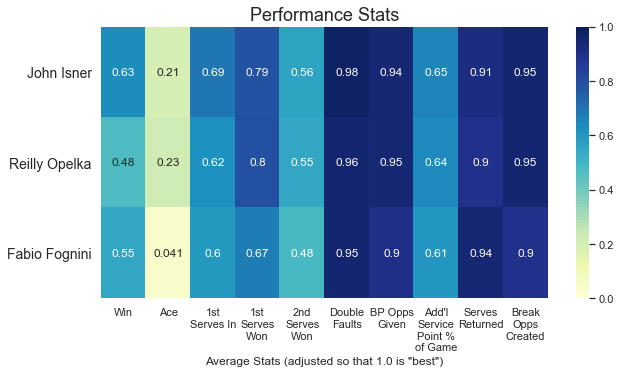

In [166]:
fig, ht = plt.subplots(figsize=(10,5))
heat = davis[['win_pct', 'ace_pct', '1st_pct','1st_win_pct', '2nd_win_pct', 'df_pct', 'bpFaced_pct', 'svpt_pct', 
              'return_pct', 'bpOpps_pct']]
colors = sns.color_palette('YlGnBu',100)
sns.heatmap(heat, cmap=colors, annot=True,  vmin=0, vmax=1)

xlab=['Win','Ace','1st Serves In','1st Serves Won','2nd Serves Won','Double Faults','BP Opps Given',"Add'l Service Point % of Game", 
      'Serves Returned','Break Opps Created']
xlab_wrap = [fill(x, 9) for x in xlab]
ht.set_xticklabels(xlab_wrap, fontsize=11, rotation=0)
ht.set_yticklabels(players, fontsize=14, rotation=0)
ht.set(ylabel='', xlabel='Average Stats (adjusted so that 1.0 is "best")')
plt.title('Performance Stats', fontsize=18)

plt.savefig('09-19 Stats.png', bbox_inches='tight')
plt.show()

In [89]:
isner = pd.concat([data_full[data_full['winner_name'] == players[0]], data_full[data_full['loser_name'] == players[0]]], axis=1)
opelk = pd.concat([data_full[data_full['winner_name'] == players[1]], data_full[data_full['loser_name'] == players[1]]], axis=1)
fogni = pd.concat([data_full[data_full['winner_name'] == players[2]], data_full[data_full['loser_name'] == players[2]]], axis=1)


In [90]:
isner

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
60,2009-1720,Bangkok,Hard,28.0,A,20090928.0,6.0,104545.0,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2009-1720,Bangkok,Hard,28.0,A,20090928.0,16.0,104545.0,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,11.0,10.0,7.0,9.0,32.0,1215.0,48.0,968.0,2009.0
118,2009-301,Auckland,Hard,28.0,A,20090112.0,6.0,104545.0,NaN,Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2009-301,Auckland,Hard,28.0,A,20090112.0,16.0,104545.0,NaN,Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31954,2019-M015,Beijing,Hard,32.0,A,20190930.0,277.0,104545.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0,11.0,10.0,0.0,2.0,1.0,10365.0,17.0,1895.0,2019.0
32009,2019-5014,Shanghai Masters,Hard,64.0,M,20191007.0,284.0,104545.0,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32026,2019-5014,Shanghai Masters,Hard,64.0,M,20191007.0,266.0,104545.0,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
opelk

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
21853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.0,19.0,11.0,5.0,7.0,35.0,1195.0,1008.0,12.0,2016.0
22940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,28.0,18.0,4.0,4.0,63.0,812.0,833.0,20.0,2016.0
23044,2016-6116,Atlanta,Hard,32.0,A,20160801.0,280.0,124187.0,NaN,WC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23053,2016-6116,Atlanta,Hard,32.0,A,20160801.0,291.0,124187.0,NaN,WC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23058,2016-6116,Atlanta,Hard,32.0,A,20160801.0,296.0,124187.0,NaN,WC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32134,2019-0328,Basel,Hard,32.0,A,20191021.0,295.0,124187.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32140,2019-0328,Basel,Hard,32.0,A,20191021.0,289.0,124187.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32153,2019-0328,Basel,Hard,32.0,A,20191021.0,276.0,124187.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,12.0,12.0,2.0,2.0,150.0,360.0,36.0,1243.0,2019.0


In [92]:
fogni

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
11,2009-1536,Madrid Masters,Clay,56.0,M,20090510.0,12.0,104926.0,NaN,Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,10.0,8.0,3.0,8.0,7.0,4030.0,72.0,970.0,2009.0
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.0,13.0,10.0,4.0,5.0,163.0,454.0,57.0,1055.0,2009.0
358,2009-321,Stuttgart,Clay,32.0,A,20090713.0,13.0,104926.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,2009-321,Stuttgart,Clay,32.0,A,20090713.0,23.0,104926.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.0,10.0,9.0,5.0,8.0,46.0,1068.0,12.0,2370.0,2019.0
32151,2019-0328,Basel,Hard,32.0,A,20191021.0,278.0,104926.0,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0,22.0,14.0,3.0,7.0,28.0,1460.0,12.0,2370.0,2019.0
32283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,14.0,12.0,3.0,5.0,150.0,360.0,12.0,2290.0,2019.0


In [101]:
# match = data_full[data_full['winner_name'] == players[2] and data_full['loser_name'] == players[1]]
pd.set_option('display.max_columns', None)
match = data_full.query('winner_name=="Fabio Fognini" & loser_name=="Reilly Opelka" ')
match.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
32287,2019-M-DC-2019-FLS-F-M-USA-ITA-01,Davis Cup Finals RR: USA vs ITA,Hard,4,D,20191120,1,104926,NaN,NaN,Fabio Fognini,R,178.0,ITA,32.487337,124187,NaN,NaN,Reilly Opelka,R,NaN,USA,22.223135,6-4 6-7(4) 6-3,3,RR,112.0,16.0,3.0,83.0,52.0,45.0,22.0,16.0,0.0,0.0,23.0,1.0,86.0,59.0,47.0,14.0,15.0,1.0,3.0,12.0,2290.0,36.0,1243.0,2019


In [206]:
stats = pd.DataFrame()

stats['ace_pct'] = match['l_ace'] / match['l_svpt']
stats['1st_pct'] = match['l_1stIn'] / match['l_svpt']
stats['1st_win_pct'] = match['l_1stWon'] / match['l_1stIn']
stats['2nd_win_pct'] = match['l_2ndWon'] / (match['l_svpt'] - match['l_1stIn'])
stats['df_pct'] = 1 - (match['l_df'] / match['l_svpt'])
stats['bpFaced_pct'] = 1 - (match['w_bpFaced'] / match['l_svpt'])
stats['svpt_pct'] = (match['l_SvGms'] / match['l_svpt'])/.25
stats['return_pct'] = 1 - (match['w_ace'] / match['w_svpt'])
stats['bpOpps_pct'] = 1 - (match['l_bpFaced'] / match['w_svpt'])


stats

,ace_pct,1st_pct,1st_win_pct,2nd_win_pct,df_pct,bpFaced_pct,svpt_pct,return_pct,bpOpps_pct
32287,0.267442,0.686047,0.79661,0.518519,0.988372,1.0,0.697674,0.807229,0.963855


In [208]:
fog_stats = pd.DataFrame()

fog_stats['ace_pct'] = match['w_ace'] / match['w_svpt']
fog_stats['1st_pct'] = match['w_1stIn'] / match['w_svpt']
fog_stats['1st_win_pct'] = match['w_1stWon'] / match['w_1stIn']
fog_stats['2nd_win_pct'] = match['w_2ndWon'] / (match['w_svpt'] - match['w_1stIn'])
fog_stats['df_pct'] = 1 - (match['w_df'] / match['w_svpt'])
fog_stats['bpFaced_pct'] = 1 - (match['l_bpFaced'] / match['w_svpt'])
fog_stats['svpt_pct'] = (match['w_SvGms'] / match['w_svpt'])/.25
fog_stats['return_pct'] = 1 - (match['l_ace'] / match['l_svpt'])
fog_stats['bpOpps_pct'] = 1 - (match['w_bpFaced'] / match['l_svpt'])

fog_stats

,ace_pct,1st_pct,1st_win_pct,2nd_win_pct,df_pct,bpFaced_pct,svpt_pct,return_pct,bpOpps_pct
32287,0.192771,0.626506,0.865385,0.709677,0.963855,0.963855,0.771084,0.732558,1.0


# Part 4: Surfaces

In [130]:
data_surf = pd.DataFrame()
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()
temp = pd.DataFrame()

ix = [0,1,2]

for p in ix:
    temp1 = data_full[data_full['winner_name'] == players[p]]
    temp2 = data_full[data_full['loser_name'] == players[p]]
    temp = temp1.append(temp2, ignore_index=True)
    data_surf = temp if p == players[0] else data_surf.append(temp, ignore_index=True)
    
data_surf.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
1319,2019-5014,Shanghai Masters,Hard,64,M,20191007,296,106421,3,NaN,Daniil Medvedev,R,NaN,RUS,23.652293,104926,10,NaN,Fabio Fognini,R,178.0,ITA,32.372348,6-3 7-6(4),3,QF,86.0,12.0,2.0,60.0,46.0,42.0,7.0,11.0,0.0,0.0,3.0,5.0,68.0,41.0,31.0,12.0,10.0,3.0,4.0,4.0,4965.0,12.0,2280.0,2019
1320,2019-0429,Stockholm,Hard,32,A,20191014,293,104386,NaN,PR,Janko Tipsarevic,R,180.0,SRB,35.310062,104926,1,NaN,Fabio Fognini,R,178.0,ITA,32.391513,6-1 6-1,3,R16,61.0,3.0,3.0,40.0,22.0,18.0,10.0,7.0,1.0,2.0,2.0,7.0,58.0,29.0,15.0,9.0,7.0,9.0,15.0,251.0,180.0,12.0,2415.0,2019
1321,2019-0328,Basel,Hard,32,A,20191021,290,105936,NaN,SE,Filip Krajinovic,R,185.0,SRB,27.646817,104926,5,NaN,Fabio Fognini,R,178.0,ITA,32.410678,6-2 6-4,3,R16,NaN,5.0,1.0,56.0,38.0,31.0,10.0,9.0,3.0,3.0,7.0,3.0,65.0,33.0,27.0,10.0,9.0,5.0,8.0,46.0,1068.0,12.0,2370.0,2019
1322,2019-0352,Paris Masters,Hard,64,M,20191028,276,133430,NaN,NaN,Denis Shapovalov,L,NaN,CAN,20.536619,104926,11,NaN,Fabio Fognini,R,178.0,ITA,32.429843,3-6 6-3 6-3,3,R32,102.0,14.0,3.0,78.0,43.0,33.0,19.0,13.0,4.0,6.0,2.0,5.0,81.0,47.0,28.0,22.0,14.0,3.0,7.0,28.0,1460.0,12.0,2370.0,2019
1323,2019-M-DC-2019-FLS-F-M-ITA-CAN-01,Davis Cup Finals RR: ITA vs CAN,Hard,4,D,20191118,1,105577,NaN,NaN,Vasek Pospisil,R,193.0,CAN,29.404517,104926,NaN,NaN,Fabio Fognini,R,178.0,ITA,32.487337,7-6(5) 7-5,3,RR,108.0,9.0,3.0,78.0,43.0,35.0,18.0,12.0,4.0,5.0,3.0,5.0,77.0,48.0,37.0,14.0,12.0,3.0,5.0,150.0,360.0,12.0,2290.0,2019


In [149]:
surf = data_surf['surface'].drop_duplicates().dropna().to_list()
ix = [0,1,2]
data_hard = data_surf[data_surf['surface'] == surf[0]]
data_clay = data_surf[data_surf['surface'] == surf[1]]
data_gras = data_surf[data_surf['surface'] == surf[2]]


## Hard Court

In [153]:

df_win = pd.pivot_table(data_hard, index='winner_name', values='winner_id', aggfunc='count')
df_los = pd.pivot_table(data_hard, index='loser_name', values='loser_id', aggfunc='count')
df_cnt = pd.merge(df_win, df_los, how="left", left_index=True, right_index=True)
df_cnt['win_pct'] = df_cnt['winner_id'] / (df_cnt['winner_id'] + df_cnt['loser_id'])

df_sum_w = pd.pivot_table(data_hard, index='winner_name', values=col[27:45], aggfunc='sum')
df_sum_l = pd.pivot_table(data_hard, index='loser_name', values=col[27:45], aggfunc='sum')

d = pd.merge(df_cnt, df_sum_w, how="left", left_index=True, right_index=True)
d = pd.merge(d, df_sum_l, how="left", left_index=True, right_index=True)

w_metrics = col[27:36]
l_metrics = col[36:45]

for w,l in zip(w_metrics,l_metrics):
    d[w] = d[w+'_x'] + d[l+'_y']
    d[l] = d[l+'_x'] + d[w+'_y']
    d = d.drop([w+'_x', w+'_y', l+'_x', l+'_y'], axis=1)
d['w_bpWon'] = d['l_bpFaced'] - d['l_bpSaved']
d['l_bpWon'] = d['w_bpFaced'] - d['w_bpSaved']

w_metrics.append('w_bpWon')
l_metrics.append('l_bpWon')

d['1st_pct'] = d['w_1stIn'] / d['w_svpt']
d['total_matches'] = d['winner_id'] + d['loser_id']
d = pd.merge(d, df_rank['avg_rank'], how="left", left_index=True, right_index=True)
d['ace_pct'] = d['w_ace'] / d['w_svpt']
d['return_pct'] = 1 - (d['l_ace'] / d['l_svpt'])
d['1st_win_pct'] = d['w_1stWon'] / d['w_1stIn']
d['bpOpps_pct'] = 1 - (d['w_bpFaced'] / d['l_svpt'])
d['bpFaced_pct'] = 1 - (d['l_bpFaced'] / d['w_svpt'])
d['svpt_pct'] = (d['w_SvGms'] / d['w_svpt']) / .25
d['df_pct'] = 1 - (d['w_df'] / d['w_svpt'])
d['2nd_win_pct'] = d['w_2ndWon'] / (d['w_svpt'] - d['w_1stIn'])

davis_hard = d.loc[players]
davis_hard.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_bpWon,l_bpWon,1st_pct,total_matches,avg_rank,ace_pct,return_pct,1st_win_pct,bpOpps_pct,bpFaced_pct,svpt_pct,df_pct,2nd_win_pct
winner_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
John Isner,290,165.0,0.637363,8135.0,3597.0,1001.0,1499.0,37924.0,38180.0,26102.0,23525.0,20611.0,18179.0,6633.0,8437.0,6186.0,6103.0,1225.0,1503.0,1735.0,2187.0,684.0,510.0,0.688271,455.0,12.521739,0.214508,0.905788,0.789633,0.954557,0.942332,0.652463,0.973605,0.561073
Reilly Opelka,35,29.0,0.546875,1401.0,716.0,218.0,216.0,5704.0,5573.0,3556.0,3571.0,2907.0,2916.0,1207.0,1158.0,924.0,911.0,167.0,203.0,243.0,280.0,77.0,76.0,0.623422,64.0,58.700000,0.245617,0.871523,0.817492,0.956397,0.950912,0.647966,0.961781,0.561918
Fabio Fognini,126,136.0,0.480916,1013.0,1496.0,1169.0,838.0,20340.0,19521.0,11693.0,11443.0,7971.0,8157.0,4155.0,3984.0,3073.0,3099.0,1194.0,1017.0,2061.0,1768.0,751.0,867.0,0.574877,262.0,12.870370,0.049803,0.923365,0.681690,0.894421,0.913078,0.604326,0.942527,0.480513


## Clay

In [154]:

df_win = pd.pivot_table(data_clay, index='winner_name', values='winner_id', aggfunc='count')
df_los = pd.pivot_table(data_clay, index='loser_name', values='loser_id', aggfunc='count')
df_cnt = pd.merge(df_win, df_los, how="left", left_index=True, right_index=True)
df_cnt['win_pct'] = df_cnt['winner_id'] / (df_cnt['winner_id'] + df_cnt['loser_id'])

df_sum_w = pd.pivot_table(data_clay, index='winner_name', values=col[27:45], aggfunc='sum')
df_sum_l = pd.pivot_table(data_clay, index='loser_name', values=col[27:45], aggfunc='sum')

d = pd.merge(df_cnt, df_sum_w, how="left", left_index=True, right_index=True)
d = pd.merge(d, df_sum_l, how="left", left_index=True, right_index=True)

w_metrics = col[27:36]
l_metrics = col[36:45]

for w,l in zip(w_metrics,l_metrics):
    d[w] = d[w+'_x'] + d[l+'_y']
    d[l] = d[l+'_x'] + d[w+'_y']
    d = d.drop([w+'_x', w+'_y', l+'_x', l+'_y'], axis=1)
d['w_bpWon'] = d['l_bpFaced'] - d['l_bpSaved']
d['l_bpWon'] = d['w_bpFaced'] - d['w_bpSaved']

w_metrics.append('w_bpWon')
l_metrics.append('l_bpWon')

d['1st_pct'] = d['w_1stIn'] / d['w_svpt']
d['total_matches'] = d['winner_id'] + d['loser_id']
d = pd.merge(d, df_rank['avg_rank'], how="left", left_index=True, right_index=True)
d['ace_pct'] = d['w_ace'] / d['w_svpt']
d['return_pct'] = 1 - (d['l_ace'] / d['l_svpt'])
d['1st_win_pct'] = d['w_1stWon'] / d['w_1stIn']
d['bpOpps_pct'] = 1 - (d['w_bpFaced'] / d['l_svpt'])
d['bpFaced_pct'] = 1 - (d['l_bpFaced'] / d['w_svpt'])
d['svpt_pct'] = (d['w_SvGms'] / d['w_svpt']) / .25
d['df_pct'] = 1 - (d['w_df'] / d['w_svpt'])
d['2nd_win_pct'] = d['w_2ndWon'] / (d['w_svpt'] - d['w_1stIn'])

davis_clay = d.loc[players]
davis_clay.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_bpWon,l_bpWon,1st_pct,total_matches,avg_rank,ace_pct,return_pct,1st_win_pct,bpOpps_pct,bpFaced_pct,svpt_pct,df_pct,2nd_win_pct
winner_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
John Isner,68,55.0,0.552846,1889.0,701.0,224.0,311.0,10849.0,10672.0,7447.0,6905.0,5732.0,5284.0,1917.0,2245.0,1707.0,1689.0,405.0,413.0,550.0,575.0,162.0,145.0,0.686423,123.0,12.521739,0.174117,0.934314,0.769706,0.948463,0.947000,0.629367,0.979353,0.563492
Reilly Opelka,2,8.0,0.200000,124.0,34.0,45.0,31.0,803.0,820.0,481.0,581.0,365.0,430.0,172.0,143.0,128.0,129.0,32.0,39.0,50.0,49.0,10.0,18.0,0.599004,10.0,58.700000,0.154421,0.958537,0.758836,0.939024,0.938979,0.637609,0.943960,0.534161
Fabio Fognini,191,126.0,0.602524,769.0,982.0,997.0,763.0,23427.0,23496.0,14304.0,14407.0,9520.0,9434.0,4452.0,4348.0,3599.0,3611.0,1302.0,1461.0,2314.0,2582.0,1121.0,1012.0,0.610578,317.0,12.870370,0.032825,0.958206,0.665548,0.901515,0.889785,0.614505,0.957442,0.487997


## Grass

In [155]:

df_win = pd.pivot_table(data_gras, index='winner_name', values='winner_id', aggfunc='count')
df_los = pd.pivot_table(data_gras, index='loser_name', values='loser_id', aggfunc='count')
df_cnt = pd.merge(df_win, df_los, how="left", left_index=True, right_index=True)
df_cnt['win_pct'] = df_cnt['winner_id'] / (df_cnt['winner_id'] + df_cnt['loser_id'])

df_sum_w = pd.pivot_table(data_gras, index='winner_name', values=col[27:45], aggfunc='sum')
df_sum_l = pd.pivot_table(data_gras, index='loser_name', values=col[27:45], aggfunc='sum')

d = pd.merge(df_cnt, df_sum_w, how="left", left_index=True, right_index=True)
d = pd.merge(d, df_sum_l, how="left", left_index=True, right_index=True)

w_metrics = col[27:36]
l_metrics = col[36:45]

for w,l in zip(w_metrics,l_metrics):
    d[w] = d[w+'_x'] + d[l+'_y']
    d[l] = d[l+'_x'] + d[w+'_y']
    d = d.drop([w+'_x', w+'_y', l+'_x', l+'_y'], axis=1)
d['w_bpWon'] = d['l_bpFaced'] - d['l_bpSaved']
d['l_bpWon'] = d['w_bpFaced'] - d['w_bpSaved']

w_metrics.append('w_bpWon')
l_metrics.append('l_bpWon')

d['1st_pct'] = d['w_1stIn'] / d['w_svpt']
d['total_matches'] = d['winner_id'] + d['loser_id']
d = pd.merge(d, df_rank['avg_rank'], how="left", left_index=True, right_index=True)
d['ace_pct'] = d['w_ace'] / d['w_svpt']
d['return_pct'] = 1 - (d['l_ace'] / d['l_svpt'])
d['1st_win_pct'] = d['w_1stWon'] / d['w_1stIn']
d['bpOpps_pct'] = 1 - (d['w_bpFaced'] / d['l_svpt'])
d['bpFaced_pct'] = 1 - (d['l_bpFaced'] / d['w_svpt'])
d['svpt_pct'] = (d['w_SvGms'] / d['w_svpt']) / .25
d['df_pct'] = 1 - (d['w_df'] / d['w_svpt'])
d['2nd_win_pct'] = d['w_2ndWon'] / (d['w_svpt'] - d['w_1stIn'])

davis_gras = d.loc[players]
davis_gras.head()

,winner_id,loser_id,win_pct,w_ace,l_ace,w_df,l_df,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_bpWon,l_bpWon,1st_pct,total_matches,avg_rank,ace_pct,return_pct,1st_win_pct,bpOpps_pct,bpFaced_pct,svpt_pct,df_pct,2nd_win_pct
winner_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
John Isner,48,19.0,0.716418,1613.0,745.0,147.0,290.0,6614.0,6797.0,4798.0,4301.0,3883.0,3405.0,1053.0,1417.0,1112.0,1109.0,148.0,200.0,206.0,307.0,107.0,58.0,0.725431,67.0,12.521739,0.243877,0.890393,0.809296,0.969693,0.953583,0.672513,0.977774,0.579846
Reilly Opelka,2,3.0,0.400000,76.0,47.0,17.0,16.0,494.0,428.0,317.0,270.0,222.0,216.0,100.0,98.0,76.0,79.0,25.0,20.0,36.0,30.0,10.0,11.0,0.641700,5.0,58.700000,0.153846,0.890187,0.700315,0.915888,0.939271,0.615385,0.965587,0.564972
Fabio Fognini,19,16.0,0.542857,192.0,349.0,180.0,142.0,3914.0,3843.0,2419.0,2433.0,1674.0,1728.0,732.0,704.0,600.0,604.0,190.0,195.0,337.0,335.0,140.0,147.0,0.618038,35.0,12.870370,0.049055,0.909186,0.692021,0.912308,0.914410,0.613183,0.954011,0.489632


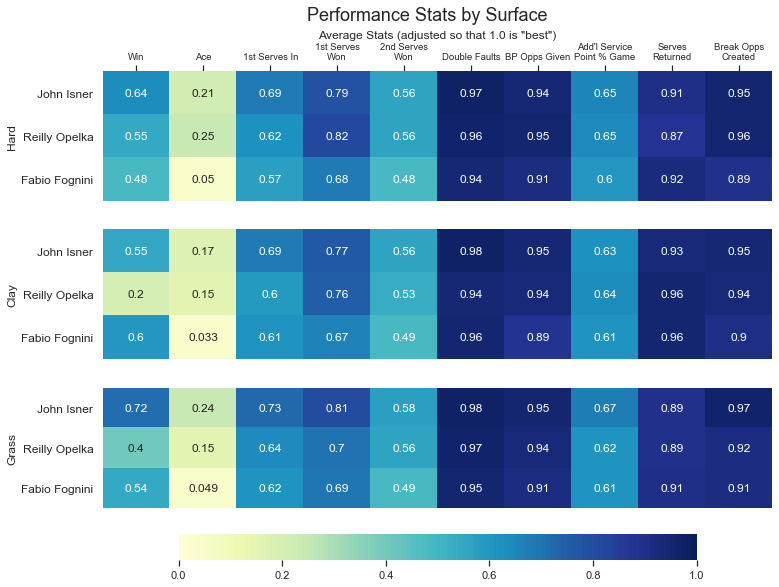

In [198]:

heat_hard = davis_hard[['win_pct', 'ace_pct', '1st_pct','1st_win_pct', '2nd_win_pct', 'df_pct', 'bpFaced_pct', 'svpt_pct', 'return_pct', 'bpOpps_pct']]
heat_clay = davis_clay[['win_pct', 'ace_pct', '1st_pct','1st_win_pct', '2nd_win_pct', 'df_pct', 'bpFaced_pct', 'svpt_pct', 'return_pct', 'bpOpps_pct']]
heat_gras = davis_gras[['win_pct', 'ace_pct', '1st_pct','1st_win_pct', '2nd_win_pct', 'df_pct', 'bpFaced_pct', 'svpt_pct', 'return_pct', 'bpOpps_pct']]


sns.set(rc={'figure.figsize':(12,9)})
colors = sns.color_palette('YlGnBu',100)

fig, (hd, cl, gr) = plt.subplots(nrows=3, gridspec_kw={"height_ratios": (.3, .3, .4)}, squeeze=True)
sns.heatmap(heat_hard, cmap=colors, annot=True,  vmin=0, vmax=1, ax=hd, cbar=None)
sns.heatmap(heat_clay, cmap=colors, annot=True,  vmin=0, vmax=1, ax=cl, cbar=None)
sns.heatmap(heat_gras, cmap=colors, annot=True,  vmin=0, vmax=1, ax=gr, cbar_kws={"orientation": "horizontal"})


xlab=['Win','Ace','1st Serves In','1st Serves Won','2nd Serves Won','Double Faults','BP Opps Given',"Add'l Service Point % Game", 'Serves Returned','Break Opps Created']
xlab_wrap = [fill(x, 13) for x in xlab]
hd.xaxis.set_ticks_position('top')
hd.xaxis.set_label_position('top')
hd.set_xticklabels(xlab_wrap, fontsize=9.5, rotation=0)
                            
hd.set_yticklabels(players, fontsize=12, rotation=0)
hd.set(ylabel='Hard', xlabel='Average Stats (adjusted so that 1.0 is "best")')

cl.set_xticklabels('')
cl.set_yticklabels(players, fontsize=12, rotation=0)
cl.set(ylabel='Clay', xlabel='')

gr.set_xticklabels('')
gr.set_yticklabels(players, fontsize=12, rotation=0)
gr.set(ylabel='Grass', xlabel='')
plt.suptitle('Performance Stats by Surface', fontsize=18)

# fig.tight_layout()

plt.savefig('09-19 Stats by Surface.png', bbox_inches='tight')
plt.show()

In [204]:
matches = pd.merge(davis_hard['total_matches'], davis_clay['total_matches'], how="left", left_index=True, right_index=True)
matches = pd.merge(matches, davis_gras['total_matches'], how="left", left_index=True, right_index=True)
matches.columns = ['Hard Court','Clay', 'Grass']
matches['Total Matches'] = matches['Hard Court'] + matches['Clay'] + matches['Grass']
matches

,Hard Court,Clay,Grass,Total Matches
winner_name,,,,
John Isner,455.0,123.0,67.0,645.0
Reilly Opelka,64.0,10.0,5.0,79.0
Fabio Fognini,262.0,317.0,35.0,614.0
